In [1]:
!pip install torchviz
!pip install pytorch_model_summary

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=b8a59fe212a3fd4439c91e0ef9130d34a2913b71d1c3ba9a707ef6112567e1f8
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [10]:
import torch
from torch import nn
from torch.autograd import Variable
from torchviz import make_dot, make_dot_from_trace

In [3]:
class SRCNN(nn.Module):
    """
    Model for SRCNN

    Input -> Conv1 -> Relu -> Conv2 -> Relu -> Conv3 -> MSE
    
    Args:
        - C1, C2, C3: num output channels for Conv1, Conv2, and Conv3
        - F1, F2, F3: filter size
    """
    def __init__(self,
                 C1=64, C2=32, C3=1,
                 F1=9, F2=1, F3=5):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, C1, F1) # in, out, kernel
        self.conv2 = nn.Conv2d(C1, C2, F2)
        self.conv3 = nn.Conv2d(C2, C3, F3)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        return x

In [4]:
class AYE_MODEL(nn.Module):
    def __init__(self, num_channels=1):
        super(AYE_MODEL, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv6 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv7 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv8 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv9 = nn.Conv2d(64, 32, kernel_size=3, padding=3 // 2,bias=False)
        self.conv10 = nn.Conv2d(32, num_channels, kernel_size=3, padding=3 // 2,bias=False)
        self.relu = nn.PReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.conv7(x)
        x = self.relu(x)
        x = self.conv8(x)
        x = self.relu(x)
        x = self.conv9(x)
        x = self.relu(x)
        x = self.conv10(x)
        x = self.relu(x)
        return x
Ayemodel = AYE_MODEL()
print(Ayemodel)

AYE_MODEL(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv9): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv10): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (relu): PReLU(num_parameters=1)
)


In [5]:
# show output shape and hierarchical view of net
from pytorch_model_summary import summary
print(summary(AYE_MODEL(), torch.zeros((1, 1, 28, 28)), show_input=False, show_hierarchical=True))

-----------------------------------------------------------------------
      Layer (type)        Output Shape         Param #     Tr. Param #
          Conv2d-1     [1, 64, 28, 28]             576             576
           PReLU-2     [1, 64, 28, 28]               1               1
          Conv2d-3     [1, 64, 28, 28]          36,864          36,864
          Conv2d-4     [1, 64, 28, 28]          36,864          36,864
          Conv2d-5     [1, 64, 28, 28]          36,864          36,864
          Conv2d-6     [1, 64, 28, 28]          36,864          36,864
          Conv2d-7     [1, 64, 28, 28]          36,864          36,864
          Conv2d-8     [1, 64, 28, 28]          36,864          36,864
          Conv2d-9     [1, 64, 28, 28]          36,864          36,864
         Conv2d-10     [1, 32, 28, 28]          18,432          18,432
         Conv2d-11      [1, 1, 28, 28]             288             288
Total params: 277,345
Trainable params: 277,345
Non-trainable params: 0
----

In [6]:
from prettytable import PrettyTable

def count_parameters(Ayemodel):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in Ayemodel.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(Ayemodel)

+---------------+------------+
|    Modules    | Parameters |
+---------------+------------+
|  conv1.weight |    576     |
|  conv2.weight |   36864    |
|  conv3.weight |   36864    |
|  conv4.weight |   36864    |
|  conv5.weight |   36864    |
|  conv6.weight |   36864    |
|  conv7.weight |   36864    |
|  conv8.weight |   36864    |
|  conv9.weight |   18432    |
| conv10.weight |    288     |
|  relu.weight  |     1      |
+---------------+------------+
Total Trainable Params: 277345


277345

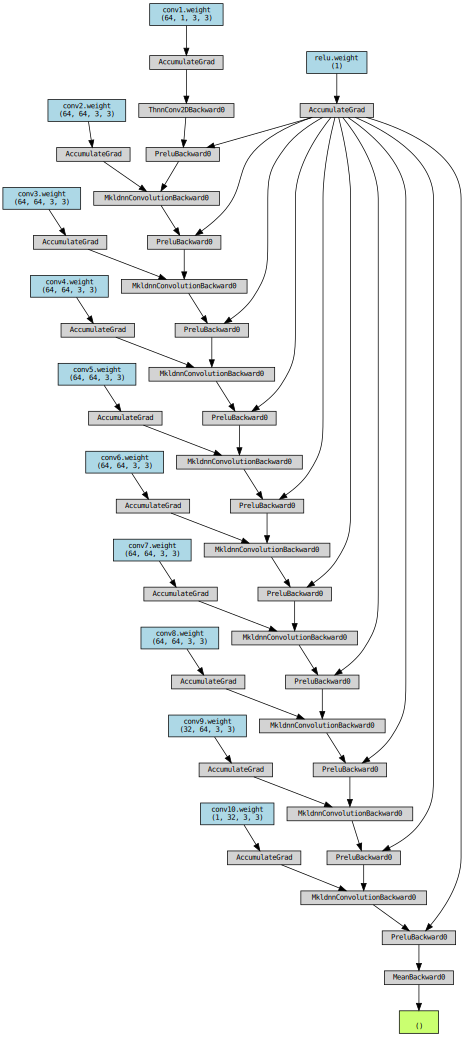

In [7]:
x = Variable(torch.randn(1,1,33,33))
y = Ayemodel(x)
make_dot(y.mean(),params=dict(Ayemodel.named_parameters()))